Install yolo v8

In [2]:
# # Pip install method (recommended)
# %pip install ultralytics==8.0.196
# %pip install -U ultralytics
# %pip install paddlepaddle --index-url https://pypi.tuna.tsinghua.edu.cn/simple
# %pip install "paddleocr>=2.7"  -f --upgrade "PyMuPDF>=1.21.0"

In [3]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import ultralytics

import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import cv2

In [4]:
from IPython import display
display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 14931MiB)
Setup complete ✅ (4 CPUs, 14.6 GB RAM, 191.7/193.6 GB disk)


In [5]:
# !pip install roboflow


In [6]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="aFwxF7XuoAUHWjyLZOyY")
# project = rf.workspace("electricity-bills").project("bills_electricity")
# version = project.version(5)
# dataset = version.download("yolov8")


In [7]:
#!yolo task=detect mode=train model=yolov8l.pt data='/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-5/data.yaml' epochs=34 plots=True

In [8]:
#!yolo task=detect mode=train model=yolov8x.pt data='/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-5/data.yaml' epochs=40 plots=True

In [9]:
#!yolo task=detect mode=train model=yolov8l.pt data='/home/ubuntu/workspace/utility/Bills_Electricity-4/data.yaml' epochs=40 plots=True

In [10]:

#!yolo task=detect mode=train model=yolov8l.pt data='/home/ubuntu/workspace/utility/Bills_Electricity-3/data.yaml' epochs=40 plots=True

In [11]:
#!yolo task=detect mode=val model="/home/ubuntu/workspace/utility/runs/detect/train14/weights/best.pt" data="/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-4/data.yaml"

In [12]:
#!yolo task=detect mode=predict iou=0.5 model="/home/ubuntu/workspace/utility/2_uu/train_final/weights/best.pt" source="/home/ubuntu/workspace/utility/2_uu/Bills_Electricity-5/train/images" save=True


Annotate the images:

In [13]:
model = YOLO("/home/ubuntu/workspace/utility/2_uu/train_final/weights/20240722_light_bills_l.pt")

In [14]:
#image_path="/home/ubuntu/workspace/utility/2_uu/uu_bills_files/train/images/baltakutty_jpg.rf.3649e62b69664efc4937c93a2e246736.jpg"
#image_path="/home/ubuntu/workspace/utility/2_uu/uu_bills_files/train/images/bharti_jpg.rf.020b8a18f51d05b98742cf149e3d3466.jpg"
image_path="/home/ubuntu/workspace/utility/2_uu/uu_bills_files/train/images/SVK-PROJECTS_jpg.rf.9d7a4617c4ffcffb199499c81b20115a.jpg"

In [15]:
results=model(image_path,verbose=False)

WARNING ⚠️ NMS time limit 0.550s exceeded


In [16]:
boards_name=[]
for i in range(0,5):
    boards_name.append(results[0].names[i])
    #print(boards_name)


In [17]:
for result in results:
        boxes = results[0].boxes.to().cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            class_name = model.names[cls]
            conf = int(box.conf[0] * 100)
            bx = box.xyxy.tolist()
            polygon_points = None
            #print(class_name)

In [71]:
import pandas as pd

def yolov8_results_to_df(result, model, device='cpu'):
    results_list = []
    for results in result:
        boxes = results.boxes.to(device).cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            path = results.path
            class_name = model.names[cls]
            conf = int(box.conf[0] * 100)
            bx = box.xyxy.tolist()
            polygon_points = None

            if results.masks is not None and len(results.masks) > 0:
                polygon_points = results.masks[0].xy[0]
                if len(polygon_points) > 1:
                    polygon_points = [polygon_points]

            df = pd.DataFrame({'path': [path], 'class_name': [class_name], 'class_id': [cls], 'confidence': [conf], 'box_coord': [bx], 'polygon_points': [polygon_points]})
            results_list.append(df)

    if not results_list:
        return pd.DataFrame()

    df = pd.concat(results_list).reset_index(drop=True)

    return df

# df = yolov8_results_to_df(result, model1,device='cpu')
# unique_boxes_df = df[['class_id', 'box_coord']].drop_duplicates()

# print(unique_boxes_df)


In [20]:
df=yolov8_results_to_df(results,model)
df

,path,class_name,class_id,confidence,box_coord,polygon_points
0,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Resi_address,8,94,"[[218.1100311279297, 255.90902709960938, 398.6...",None
1,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,CUSTOMER_ID,5,92,"[[217.95724487304688, 218.75267028808594, 337....",None
2,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Date,6,83,"[[217.98898315429688, 124.25481414794922, 328....",None
3,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Name,7,80,"[[217.45021057128906, 240.84725952148438, 408....",None


In [21]:
# #After selecting the class_ids with the highest confidence and removing any duplicate entries there
new_df=df.loc[df.groupby('class_id')['confidence'].idxmax()]
new_df


,path,class_name,class_id,confidence,box_coord,polygon_points
1,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,CUSTOMER_ID,5,92,"[[217.95724487304688, 218.75267028808594, 337....",None
2,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Date,6,83,"[[217.98898315429688, 124.25481414794922, 328....",None
3,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Name,7,80,"[[217.45021057128906, 240.84725952148438, 408....",None
0,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Resi_address,8,94,"[[218.1100311279297, 255.90902709960938, 398.6...",None


In [22]:
#After removing the logo part the datatfram looks like this now.
newest_df = new_df.drop(new_df[new_df['class_id'] .isin([0,1,2,3,4])].index)
newest_df



,path,class_name,class_id,confidence,box_coord,polygon_points
1,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,CUSTOMER_ID,5,92,"[[217.95724487304688, 218.75267028808594, 337....",None
2,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Date,6,83,"[[217.98898315429688, 124.25481414794922, 328....",None
3,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Name,7,80,"[[217.45021057128906, 240.84725952148438, 408....",None
0,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Resi_address,8,94,"[[218.1100311279297, 255.90902709960938, 398.6...",None


In [23]:
points=[]
for point in new_df['box_coord']:
  points.append(point[0])

print(points)

[[217.95724487304688, 218.75267028808594, 337.8127136230469, 238.0120849609375], [217.98898315429688, 124.25481414794922, 328.41094970703125, 138.15615844726562], [217.45021057128906, 240.84725952148438, 408.1282653808594, 253.4836883544922], [218.1100311279297, 255.90902709960938, 398.6571960449219, 301.06488037109375]]


In [24]:
title=[]
for i in new_df['class_name']:
  title.append(i)

print(title)

['CUSTOMER_ID', 'Date', 'Name', 'Resi_address']


In [25]:
new_title=[]
for j in newest_df['class_name']:
    new_title.append(j)
print(new_title)


['CUSTOMER_ID', 'Date', 'Name', 'Resi_address']


In [26]:
poss_classes=[]
for i in range(len(results[0].names)):
     #print(results[0].names[i])
     poss_classes.append(results[0].names[i])

ele_not_pred = [i for i in poss_classes if i not in title]
ele_not_pred



['BOARD_ADANI',
 'BOARD_BESCOM',
 'BOARD_BSES',
 'BOARD_KOLKATA',
 'BOARD_MAHAVITRAN',
 'name-address']

In [27]:
board_if_exists=list((set(boards_name)).intersection(set((title))))

In [28]:
#a=array_intersect(boards_name,title)
# print([0])

In [29]:
if board_if_exists==[] :
    board_if_exists="COULDN'T DETECT THE BOARD"
else:
    board_if_exists=list((set(boards_name)).intersection(set((title))))



In [30]:
import tensorflow as tf
tf.convert_to_tensor(points)

2024-08-12 11:55:41.462832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 11:55:41.486272: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 11:55:41.493840: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1723443943.650039  104520 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723443943.655088  104520 cuda_executor.cc:1015] succ

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[     217.96,      218.75,      337.81,      238.01],
       [     217.99,      124.25,      328.41,      138.16],
       [     217.45,      240.85,      408.13,      253.48],
       [     218.11,      255.91,      398.66,      301.06]], dtype=float32)>

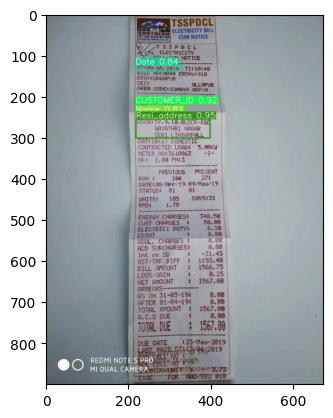

In [31]:
image_ann=results[0].plot()
plt.imshow(image_ann)
plt.show()

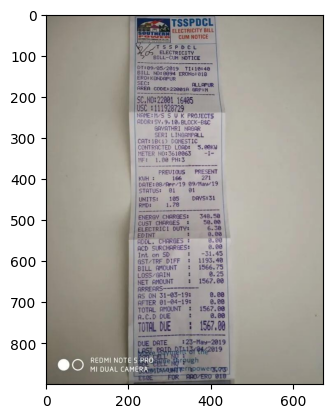

In [32]:
import cv2
#image_actual = cv2.imread(image_path)
image_actual=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(image_actual)
plt.show()

In [33]:
title

['CUSTOMER_ID', 'Date', 'Name', 'Resi_address']

In [34]:
# with open('myfile.txt', 'w') as fp:
#     pass

In [35]:
import shutil
directory_path= "/home/ubuntu/workspace/utility/Cropped"
if os.path.exists(directory_path):
    shutil.rmtree(directory_path)


In [36]:
parent_directory="/home/ubuntu/workspace/utility"
new_dir="Cropped"
path=os.path.join(parent_directory,new_dir)
os.mkdir(path)

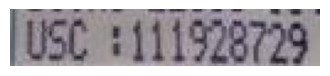

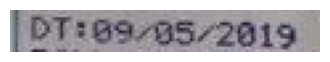

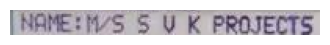

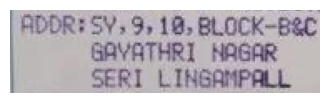

In [37]:
# Iterate over each bounding box
import os 
for box in (points):
    # Extract coordinates and convert to integers
    x1, y1, x2, y2 = [int(coord) for coord in box]

    # Ensure coordinates are within the image dimensions
    height, width, _ = image_actual.shape
    x1, x2 = min(max(x1, 0), width), min(max(x2, 0), width)
    y1, y2 = min(max(y1, 0), height), min(max(y2, 0), height)

    x1=int(x1-(x1*1)/100)
    x2=int(x2+(x2*1)/100)
    y1=int(y1-(y1*0.75)/100)
    y2=int(y2+(y2*0.75)/100)

    

    # Slice the image
    img_slice = image_actual[y1:y2, x1:x2]

    # Plot the image slice
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice)
    #plt.title(f"Box: ({x1}, {y1}) to ({x2}, {y2})")
    plt.axis('off')  # Hide axes for better visualization

    

In [38]:
# Iterate over each bounding box
import os 
for i, box in enumerate(points):
    # Extract coordinates and convert to integers
    x1, y1, x2, y2 = [int(coord) for coord in box]

    # Ensure coordinates are within the image dimensions
    height, width, _ = image_actual.shape
    x1, x2 = min(max(x1, 0), width), min(max(x2, 0), width)
    y1, y2 = min(max(y1, 0), height), min(max(y2, 0), height)

    x1=int(x1-(x1*1)/100)
    x2=int(x2+(x2*1)/100)
    y1=int(y1-(y1*0.75)/100)
    y2=int(y2+(y2*0.75)/100)

    

    # Slice the image
    img_slice = image_actual[y1:y2, x1:x2]

    # Plot the image slice
    plt.figure(figsize=(4, 4))
    plt.imshow(img_slice)
    #plt.title(f"Box: ({x1}, {y1}) to ({x2}, {y2})")
    plt.axis('off')  # Hide axes for better visualization

    for class_name in newest_df['class_name'].values:

    # Save the image
        save_path = os.path.join(f"/home/ubuntu/workspace/utility/Cropped/image_{i}.jpg")

        #save_path = os.path.join(f"/home/ubuntu/workspace/utility/Cropped/Utility_{class_name}.jpg")
                #img_path = f"/home/ubuntu/workspace/utility/Cropped/Utility_{class_name}.jpg"

        plt.savefig(save_path)

    plt.close()  # Close the plot to release memory

print("Images saved successfully.")


Images saved successfully.


In [39]:
import matplotlib.pyplot as plt # type: ignore
from PIL import Image
import cv2
import numpy as np

In [40]:
# from ultralytics import YOLO
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# import os

In [41]:
#pip install paddlepaddle paddleocr


In [42]:
img_path="/home/ubuntu/workspace/utility/Cropped/image_0.jpg"

In [43]:
from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(use_angle_cls=True, lang='en', show_log=True, ocr_version='PP-OCRv4') # Initialize the ocr object again.

#img_path="/content/drive/MyDrive/bangalore_folder/blr-1/cropped/image_1.png"



[2024/08/12 11:55:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/ubuntu/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/ubuntu/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

In [44]:
import logging
from paddleocr import PaddleOCR

# Set up PaddleOCR
# ocr = PaddleOCR()
logging.getLogger('ppocr').setLevel(logging.INFO)

In [45]:
import cv2
import matplotlib.pyplot as plt
image_actual = cv2.imread(image_path)
plt_figure = plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(image_actual)
save_path = os.path.join("/home/ubuntu/workspace/utility/tbc", 'actual.png')
plt.savefig(save_path)
plt.close()  # Close the plot to release memory

print("Images saved successfully.")
plt.show()

Images saved successfully.


In [46]:
import cv2
import matplotlib.pyplot as plt
image_ann=image_ann=results[0].plot()
plt.axis('off')
plt.imshow(image_ann)
save_path=os.path.join("/home/ubuntu/workspace/utility/tbc", 'ann.png')
plt.savefig(save_path)
plt.close()  # Close the plot to release memory

print("Images saved successfully.")
plt.show()



Images saved successfully.


In [47]:
import matplotlib.pyplot as plt
#image_cr="/content/drive/MyDrive/mumbai_Adani/adani-1/image_1.png"
image_cropped=plt.imread(img_path)
plt.axis('off')
plt.imshow(image_cropped)

save_p=os.path.join("/home/ubuntu/workspace/utility/tbc", 'cropped.png')
plt.savefig(save_p)
plt.close()
print("Images saved successfully.")


plt.show()

Images saved successfully.


In [48]:
# texts=[]
# for idx in range(len(result)):
#     res = result[idx]

#     for line in res:
#         text = line[1][0]  # Extract the recognized text
#         texts.append(text)
#     print(" ".join(texts))


In [49]:
# sasa=plt.imread("/home/ubuntu/workspace/utility/Cropped/image_4.png")
# plt.imshow(sasa)

In [50]:
# arr = []
# if (len(title)>4):
#     for i in range(0, 5):
#         img_path = f"/home/ubuntu/workspace/utility/Cropped/image_{i}.png"
#         result = ocr.ocr(img_path, det=True, rec=True)

#         texts = []  # Initialize the texts list outside of the loop over result
#         for idx in range(len(result)):
#             res = result[idx]
#             for line in res:
#                 text = line[1][0]  # Extract the recognized text
#                 texts.append(text)
#                 full_line=" ".join(texts)

#         print(full_line)  # Join texts with spaces, print, and add an extra newline
#         arr.append(full_line)

#     # Filter out None elements from arr
#     arr = [texts for texts in arr if texts is not None]

In [51]:
df

,path,class_name,class_id,confidence,box_coord,polygon_points
0,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Resi_address,8,94,"[[218.1100311279297, 255.90902709960938, 398.6...",None
1,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,CUSTOMER_ID,5,92,"[[217.95724487304688, 218.75267028808594, 337....",None
2,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Date,6,83,"[[217.98898315429688, 124.25481414794922, 328....",None
3,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Name,7,80,"[[217.45021057128906, 240.84725952148438, 408....",None


In [52]:
arr = []
for i in range(1,len(title)):
        img_path = f"/home/ubuntu/workspace/utility/Cropped/image_{i}.jpg"
        result = ocr.ocr(img_path, det=True, rec=True)

        texts = []  # Initialize the texts list outside of the loop over result
        for idx in range(len(result)):
            
            res = result[idx]
            print("res:  ",res)
            if res is not None:
                for line in res:
                    print("line:  ",line)
                    text = line[1][0]  # Extract the recognized text
                    print("text:  ",text)
                    texts.append(text)
                full_line=" ".join(texts)
            
                print("full_line:  ",full_line)


        #print(full_line)  # Join texts with spaces, print, and add an extra newline
        arr.append(full_line)

    # Filter out None elements from arr
arr = [texts for texts in arr if texts is not None]


res:   [[[[65.0, 185.0], [336.0, 192.0], [335.0, 219.0], [64.0, 212.0]], ('DT:09/05/2019', 0.9448912739753723)]]
line:   [[[65.0, 185.0], [336.0, 192.0], [335.0, 219.0], [64.0, 212.0]], ('DT:09/05/2019', 0.9448912739753723)]
text:   DT:09/05/2019
full_line:   DT:09/05/2019
res:   [[[[53.0, 191.0], [355.0, 193.0], [355.0, 215.0], [53.0, 212.0]], ('NAMEMS S VK PROJECTS', 0.8948879241943359)]]
line:   [[[53.0, 191.0], [355.0, 193.0], [355.0, 215.0], [53.0, 212.0]], ('NAMEMS S VK PROJECTS', 0.8948879241943359)]
text:   NAMEMS S VK PROJECTS
full_line:   NAMEMS S VK PROJECTS
res:   [[[[59.0, 162.0], [355.0, 165.0], [355.0, 187.0], [59.0, 184.0]], ('ADDRSY910BLOCK-BC', 0.9246430993080139)], [[[131.0, 192.0], [317.0, 192.0], [317.0, 212.0], [131.0, 212.0]], ('GAYATHRI NAGAR', 0.9246195554733276)], [[[133.0, 219.0], [328.0, 219.0], [328.0, 241.0], [133.0, 241.0]], ('SERI LINGAMPALL', 0.9776504039764404)]]
line:   [[[59.0, 162.0], [355.0, 165.0], [355.0, 187.0], [59.0, 184.0]], ('ADDRSY910BLOCK-

In [53]:
arr

['DT:09/05/2019',
 'NAMEMS S VK PROJECTS',
 'ADDRSY910BLOCK-BC GAYATHRI NAGAR SERI LINGAMPALL']

In [54]:
# arr = []
# for class_name in newest_df['class_name'].values:
#     if class_name not in boards_name:

        
#         img_path = f"/home/ubuntu/workspace/utility/Cropped/Utility_{class_name}.jpg"
#         result = ocr.ocr(img_path, det=True, rec=True)

#         texts = []  # Initialize the texts list outside of the loop over result
#         for idx in range(len(result)):
#             res = result[idx]
#             print(res)
            
#             if res is not None:
#                 for line in res:
#                     text = line[1][0]  # Extract the recognized text
#                     texts.append(text)
#                     print(texts)

#                     full_line=" ".join(texts)

#         #print(full_line)  # Join texts with spaces, print, and add an extra newline
#         arr.append(full_line)

#     # Filter out None elements from arr
# arr = [texts for texts in arr if texts is not None]


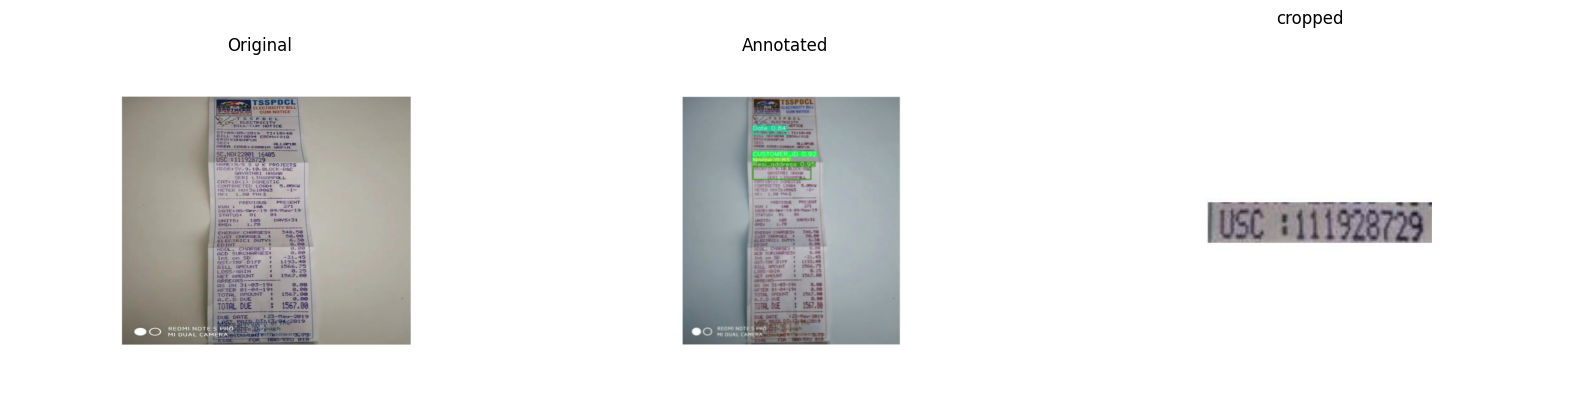

In [55]:
import cv2
from matplotlib import pyplot as plt

# Function to resize an image to a target size
def resize_image(image, target_size):
    return cv2.resize(image, target_size)

# Set the target size for all images (width, height)
target_size = (1400,900)  # Adjust as needed

# Read images
Image1 = plt.imread("/home/ubuntu/workspace/utility/tbc/actual.png")
Image2 = cv2.imread("/home/ubuntu/workspace/utility/tbc/ann.png")
Image3 = cv2.imread("/home/ubuntu/workspace/utility/tbc/cropped.png")

# Resize images
Image1 = resize_image(Image1, target_size)
Image2 = resize_image(Image2, target_size)
# Image3 = resize_image(Image3, target_size)

# Convert images from BGR to RGB format for correct color display
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)

# Set the figure size
fig = plt.figure(figsize=(20, 40))

# Define the number of rows and columns for subplots
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Annotated")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("cropped")

# Adjust layout for symmetry
plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.05)

# Show the plot
plt.show()


In [56]:
print("\n".join(arr)+ "\n")

texts.append("\n")

DT:09/05/2019
NAMEMS S VK PROJECTS
ADDRSY910BLOCK-BC GAYATHRI NAGAR SERI LINGAMPALL



In [57]:
arr

['DT:09/05/2019',
 'NAMEMS S VK PROJECTS',
 'ADDRSY910BLOCK-BC GAYATHRI NAGAR SERI LINGAMPALL']

In [58]:
new_df

,path,class_name,class_id,confidence,box_coord,polygon_points
1,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,CUSTOMER_ID,5,92,"[[217.95724487304688, 218.75267028808594, 337....",None
2,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Date,6,83,"[[217.98898315429688, 124.25481414794922, 328....",None
3,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Name,7,80,"[[217.45021057128906, 240.84725952148438, 408....",None
0,/home/ubuntu/workspace/utility/2_uu/uu_bills_f...,Resi_address,8,94,"[[218.1100311279297, 255.90902709960938, 398.6...",None


pre processing of date

In [59]:
if  'Date' in new_title:
    date=arr[new_title.index('Date')]

    new_date=[i for i in date if i.isdigit() or i is "-" or i is "/"]
    print(new_date)

    # new_date=[a for a in date if a not in ele]
    # print(new_date)

    date_final=[]
    date_final=''.join(new_date)
    x=min(10,len(date_final))
    print(date_final[:x])
    arr[new_title.index('Date')]=date_final




[]



pre processing of consumer_id


In [60]:
if  'CUSTOMER_ID' in title:

    cid=arr[new_title.index('CUSTOMER_ID')]

    print(cid)
    new_cid=[i for i in cid if i.isdigit()]
    print(new_cid)

    # # new_cid=[a for a in cid if a not in el2]
    # # print(new_cid)

    # cid_final=[]
    cid_final=''.join(new_cid)
    print(cid_final)
    arr[new_title.index('CUSTOMER_ID')]=cid_final


DT:09/05/2019
['0', '9', '0', '5', '2', '0', '1', '9']
09052019


pre processing of name-address

In [61]:
# if  'name-address' in title:

#     name_add=arr[new_title.index('name-address')]

#     print(name_add)
#     i='Name and Address'
#     #name_add_re=[i for i in name_add if i in name_add]

#     x=name_add.split(i,2)

#     y=x[-1].split(".",1)
#     retrieved_name=(y[0])
#     retrieved_address=(y[1])
#     print(retrieved_address)



In [62]:
new_title

['CUSTOMER_ID', 'Date', 'Name', 'Resi_address']

In [63]:
lst_class_names=list(newest_df['class_name'])

In [64]:
def splitting_name_Address():
    if  'name-address' in new_title:

        name_add=arr[new_title.index('name-address')]
        new_title.pop()
        

        print(name_add)
        i='Name and Address'
        #name_add_re=[i for i in name_add if i in name_add]

        

        x=name_add.split(i,2)

        y=x[-1].split(".",2)
        retrieved_address=(y[-1])

        if len(y[0])<4:
            retrieved_name=y[0]+"."+y[1]

        else:
            retrieved_name=x[-1].split(".",1)[0]


        new_title.append('Name')
        new_title.append('Resi_address')

        arr.pop()
        arr.append(retrieved_name)
        arr.append(retrieved_address)

        #print(y)



In [65]:
splitting_name_Address()

In [66]:
arr

['09052019', '', 'ADDRSY910BLOCK-BC GAYATHRI NAGAR SERI LINGAMPALL']

In [67]:
if 'name-address' in new_title:
    Resi_address_on_bills=arr[new_title.index('name-address')]
    



In [68]:
arr

['09052019', '', 'ADDRSY910BLOCK-BC GAYATHRI NAGAR SERI LINGAMPALL']

In [69]:
new_title

['CUSTOMER_ID', 'Date', 'Name', 'Resi_address']

In [70]:
import pandas as pd

# create a dataframe
data = {'Identified_Elements': [i for i in new_title], 'OCR': [i for i in arr ]}
df = pd.DataFrame(data)

# loop through the rows using iterrows()
for index, row in df.iterrows():
    print(row['Identified_Elements'],"|" ,row['OCR'])

ValueError: All arrays must be of the same length

In [ ]:
df

,Identified_Elements,OCR
0,CUSTOMER_ID,151835565
1,Date,11-07-2020
2,Name,MSBHARTI MISHRA
3,Resi_address,WOSH.ANANTJIMSHRAGZ-A1 FIRSTFLOORUNIT1KH.NO136...


In [ ]:
import cv2
from matplotlib import pyplot as plt


# Function to resize an image to a target size
def resize_image(image, target_size):
    return cv2.resize(image, target_size)

# Define the number of rows and columns for subplots
    rows = 1
    columns = len(title)


# Set the target size for all images (width, height)
    #target_size = (1400,900)  # Adjust as needed

# Read images

# Set the figure size
    fig = plt.figure(figsize=(20, 40))

    for i in range(0,title):
        f'Image{i}=cv2.imread("/home/ubuntu/workspace/utility/Cropped/image_{i}.png")'
        f'Image{i}=cv2.cvtColor(Image{i}, cv2.COLOR_BGR2RGB)'

    for i in range(0,title):
        fig.add_subplot(rows, columns,i)
        plt.imshow(f'Image{i}')
        plt.title(f'title[{i}]')
        


# Convert images from BGR to RGB format for correct color display



# #Adds a subplot at the 1st position
# fig.add_subplot(rows, columns, 1)
# plt.imshow(Image1)
# plt.axis('off')
# plt.title(title[0])

# # # Adds a subplot at the 2nd position
# fig.add_subplot(rows, columns, 2)
# plt.imshow(Image2)
# plt.axis('off')
# plt.title(title[1])

# # # Adds a subplot at the 3rd position
# fig.add_subplot(rows, columns, 3)
# plt.imshow(Image3)
# plt.axis('off')
# plt.title(title[2])


# fig.add_subplot(rows, columns, 4)
# plt.imshow(Image4)
# plt.axis('off')
# plt.title(title[3])

# if(len(title)>4):
#     fig.add_subplot(rows, columns, 5)
#     plt.imshow(Image5)
#     plt.axis('off')
#     plt.title(title[4])

# Adjust layout for symmetry
# plt.subplots_adjust(wspace=0.05)
# plt.subplots_adjust(hspace=0.05)

# # Show the plot
plt.show()


In [ ]:
# rows = 1
# columns = len(title)

# fig = plt.figure(figsize=(20, 40))

# base_path = '/home/ubuntu/workspace/utility/Cropped/'
# import os

# images = [ x for x in os.listdir(base_path) if x !='.']
# images.sort()

# images_d = []
# for i in images:
#     image_path = base_path + i
#     image = cv2.imread(image_path)
#     images_d.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


# for i in range(1,len(title)+1):
#     fig.add_subplot(rows, columns,i)
#     plt.imshow(images_d[i-1])
#     plt.title(title[i-1])

# plt.show()

In [ ]:
df

,Identified_Elements,OCR
0,CUSTOMER_ID,151835565
1,Date,11-07-2020
2,Name,MSBHARTI MISHRA
3,Resi_address,WOSH.ANANTJIMSHRAGZ-A1 FIRSTFLOORUNIT1KH.NO136...


In [ ]:
if board_if_exists!=[]:
    board_if_exists=board_if_exists[0]

In [ ]:
ele_not_pred

['BOARD_ADANI',
 'BOARD_BESCOM',
 'BOARD_KOLKATA',
 'BOARD_MAHAVITRAN',
 'name-address']

In [ ]:
#ele_not_pred
unpredicted_ele=[i for i in ele_not_pred if i not in boards_name]
unpredicted_ele

['name-address']

In [ ]:

new_title


['CUSTOMER_ID', 'Date', 'Name', 'Resi_address']

In [ ]:
if 'CUSTOMER_ID' in (ele_not_pred):
    print(True)
    
    #['Date','Name','CUSTOMER_ID']

In [ ]:
if 'Name' in new_title:
    name_on_bills=arr[new_title.index('Name')]
else:
    name_on_bills="NOT DETECTED"


In [ ]:
if 'CUSTOMER_ID' in new_title:
    CUSTOMER_ID_on_bills=arr[new_title.index('CUSTOMER_ID')]
else:
    CUSTOMER_ID_on_bills="NOT DETECTED"


In [ ]:
if 'Resi_address' in new_title:
    Resi_address_on_bills=arr[new_title.index('Resi_address')]
else:
    Resi_address_on_bills="NOT DETECTED"


In [ ]:

def extract_details(image):
    data  = dict()

    data['Board'] = board_if_exists

    data['name'] = name_on_bills

    data['address'] = Resi_address_on_bills
    
    data['Customer_id'] = arr[new_title.index('CUSTOMER_ID')]

    data['Date'] = arr[new_title.index('Date')]
    
    return data

    
    

In [ ]:
image = ''
result = extract_details(image)

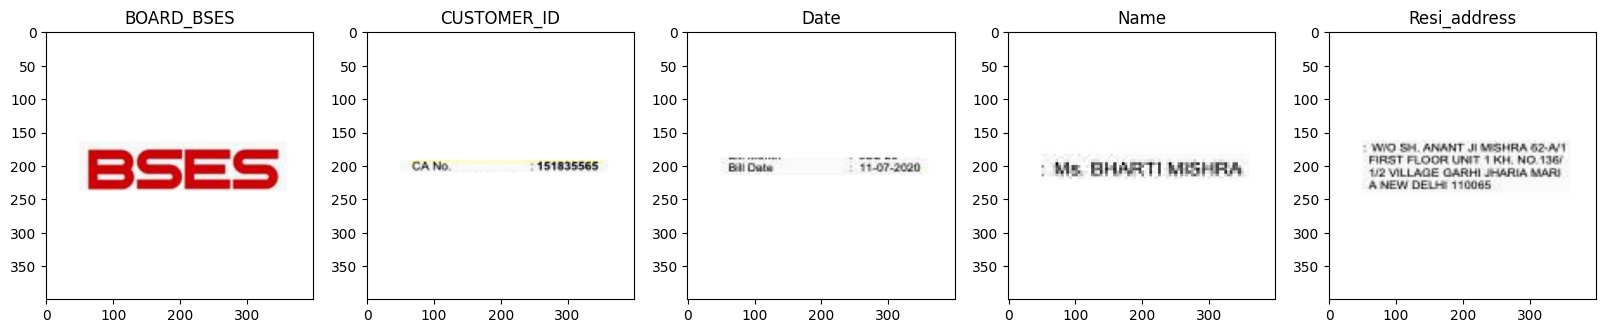

In [ ]:
rows = 1
columns = len(title)

fig = plt.figure(figsize=(20, 40))

base_path = '/home/ubuntu/workspace/utility/Cropped/'
import os

images = [ x for x in os.listdir(base_path) if x !='.']
images.sort()

images_d = []
for i in images:
    image_path = base_path + i
    image = cv2.imread(image_path)
    images_d.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


for i in range(1,len(title)+1):
    fig.add_subplot(rows, columns,i)
    plt.imshow(images_d[i-1])
    plt.title(title[i-1])

plt.show()

In [ ]:
extract_details(image)

{'Board': 'BOARD_BSES',
 'name': 'MSBHARTI MISHRA',
 'address': 'WOSH.ANANTJIMSHRAGZ-A1 FIRSTFLOORUNIT1KH.NO136 12VILLAGECARHIHARIAMARI ANEWDELH110085',
 'Customer_id': '151835565',
 'Date': '11-07-2020'}